In [1]:
pip install pot

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.6/865.6 kB 20.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import adjusted_rand_score
import ot
from mpl_toolkits.mplot3d import Axes3D
import cv2
import os

## Simple data

<ipython-input-3-9526eb6e6808>:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=30, cmap='viridis')


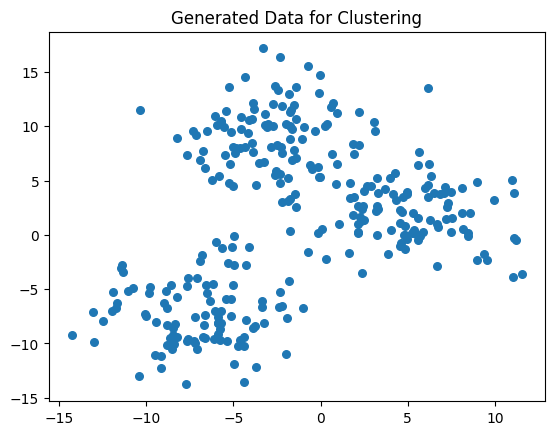

In [3]:
n_samples = 300
X, true_labels = make_blobs(n_samples=n_samples, centers=3, cluster_std=3, random_state=42)

plt.scatter(X[:, 0], X[:, 1], s=30, cmap='viridis')
plt.title('Generated Data for Clustering')
plt.show()

In [4]:
def emd_distance(X, Y):
    M = np.abs(X[:, None] - Y[None, :])
    return ot.emd2(np.ones(len(X)) / len(X), np.ones(len(Y)) / len(Y), M)

def euclidean_distance(X, Y):
    return np.linalg.norm(X - Y)

def kmeans(X, k=3, max_iter=100, distance_metric="euclidean"):
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    
    for iteration in range(max_iter):
        labels = []
        for i in range(X.shape[0]):
            distances = []
            for j in range(k):
                if distance_metric == "emd":
                    distances.append(emd_distance(X[i], centroids[j]))
                else:
                    distances.append(euclidean_distance(X[i], centroids[j]))
            closest_centroid = np.argmin(distances)
            labels.append(closest_centroid)
        labels = np.array(labels)
        new_centroids = np.zeros_like(centroids)
        for j in range(k):
            cluster_points = X[labels == j]
            if cluster_points.shape[0] > 0:
                if distance_metric == "emd":
                    distances = np.array([np.sum([emd_distance(cluster_points[i], cluster_points[j]) for j in range(cluster_points.shape[0])])
                                          for i in range(cluster_points.shape[0])])
                    new_centroids[j] = cluster_points[np.argmin(distances)]
                else:
                    new_centroids[j] = np.mean(cluster_points, axis=0)
        
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
        
    return centroids, labels

0.6874865733689998 0.9217357462672372


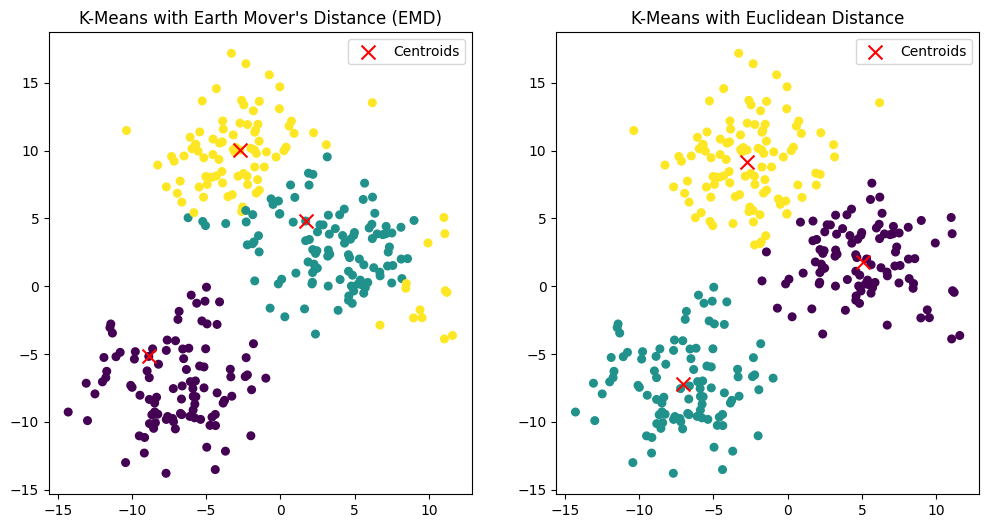

In [5]:
centroids_emd, labels_emd = kmeans(X, k=3, max_iter=100, distance_metric="emd")
centroids_euclidean, labels_euclidean = kmeans(X, k=3, max_iter=100, distance_metric="euclidean")

ari1 = adjusted_rand_score(labels_emd, true_labels)
ari2 = adjusted_rand_score(labels_euclidean, true_labels)
print(ari1, ari2)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=labels_emd, s=30, cmap='viridis')
plt.scatter(centroids_emd[:, 0], centroids_emd[:, 1], color='red', marker='x', s=100, label="Centroids")
plt.title('K-Means with Earth Mover\'s Distance (EMD)')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=labels_euclidean, s=30, cmap='viridis')
plt.scatter(centroids_euclidean[:, 0], centroids_euclidean[:, 1], color='red', marker='x', s=100, label="Centroids")
plt.title('K-Means with Euclidean Distance')
plt.legend()

plt.show()

<ipython-input-6-005aad82354e>:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X[:, 0], X[:, 1], X[:, 2], s=30, cmap='viridis')


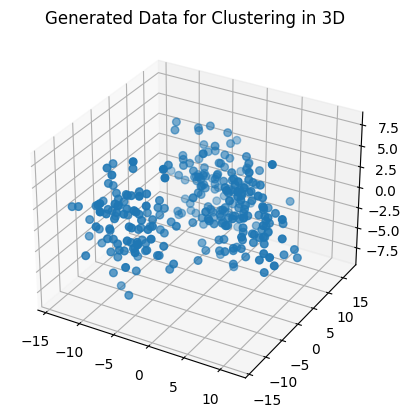

In [6]:
n_samples = 300
X, true_labels = make_blobs(n_samples=n_samples, centers=3, cluster_std=3, random_state=42)
X = np.hstack((X, np.random.randn(n_samples, 1) * 3))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], s=30, cmap='viridis')
ax.set_title('Generated Data for Clustering in 3D')
plt.show()

0.5903659600012585 0.9217357462672372


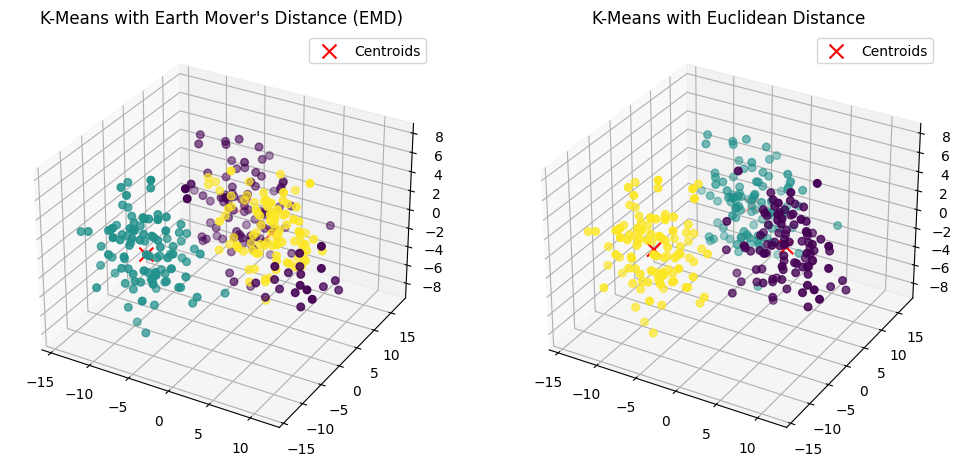

In [7]:
centroids_emd, labels_emd = kmeans(X, k=3, max_iter=100, distance_metric="emd")
centroids_euclidean, labels_euclidean = kmeans(X, k=3, max_iter=100, distance_metric="euclidean")

ari1 = adjusted_rand_score(labels_emd, true_labels)
ari2 = adjusted_rand_score(labels_euclidean, true_labels)
print(ari1, ari2)

fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels_emd, s=30, cmap='viridis')
ax1.scatter(centroids_emd[:, 0], centroids_emd[:, 1], centroids_emd[:, 2], color='red', marker='x', s=100, label="Centroids")
ax1.set_title('K-Means with Earth Mover\'s Distance (EMD)')
ax1.legend()

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels_euclidean, s=30, cmap='viridis')
ax2.scatter(centroids_euclidean[:, 0], centroids_euclidean[:, 1], centroids_euclidean[:, 2], color='red', marker='x', s=100, label="Centroids")
ax2.set_title('K-Means with Euclidean Distance')
ax2.legend()

plt.show()

In [8]:
n_samples = 300
X, true_labels = make_blobs(n_samples=n_samples, centers=3, cluster_std=3, n_features=100, random_state=42)

In [9]:
centroids_emd, labels_emd = kmeans(X, k=3, max_iter=100, distance_metric="emd")
centroids_euclidean, labels_euclidean = kmeans(X, k=3, max_iter=100, distance_metric="euclidean")

ari1 = adjusted_rand_score(labels_emd, true_labels)
ari2 = adjusted_rand_score(labels_euclidean, true_labels)
print(ari1, ari2)

0.35947623815202184 1.0


The Euclidean Distance simply outperformed EMD, maybe because:
- The clusters are well-separated and roughly spherical or uniformly shaped.
- The data does not require the sophisticated, distribution-sensitive comparison that EMD provides.
  
Next, i will test with a "distribution-sensitive" dataset (Text or Image).